<style>
    .title_container {
        margin: auto;
        background: rgb(81,92,103);
        background: linear-gradient(90deg, rgba(81,92,103,1) 36%, rgba(12,35,66,1) 62%);
        border-radius: 7px;
        color: white;
        text-align:center;
        width:75%;
        padding-top:2%;
        padding-bottom:2%;
    }
    
    .question_container {
        margin: auto;
        background: rgb(84,138,142);
        background: linear-gradient(90deg, rgba(84,138,142,1) 41%, rgba(145,201,73,1) 81%);
        border-radius: 7px;
        color: white;
        text-align:left;
        width:75%;
        padding-top:1%;
        padding-bottom:1%;
        padding-left: 2%;
        margin-top:2%;
    }
    
    .question_container p {
        font-size: 16px;
    }
    
    .alert_container {
        margin: auto;
        background: rgb(142,94,84);
        background: linear-gradient(128deg, rgba(142,94,84,1) 13%, rgba(201,103,73,1) 69%);
        border-radius: 7px;
        color: white;
        text-align:left;
        width:75%;
        padding-top:1%;
        padding-bottom:1%;
        padding-left: 2%;
        margin-top:2%;
    }
    
    .alert_container p {
        font-size: 16px;
    }
    
    .code_span {
        background-color: #E2E7EC;
        padding:2px;
        border-radius:1px;
        font-family: Consolas,monaco,monospace;
        color:black;
    }
</style>

<div class ='title_container'>
    <h1> Análisis de Datos II </h1>
    <h2> Profesor: Oldemar Rodríguez </h2>
    <h3> Estudiante: Jimmy Calvo Monge </h3>
    <h3> Carné: B31281 </h3>
    <hr style='color:white; width:80%;'>
    <h4> TAREA 14 </h4>
    <h4> Fecha de entrega: 3 de Diciembre de 2022 </h4>
</div>

Importamos los módulos necesarios para resolver esta tarea.

In [1]:
### Basicos
import numpy as np
import pandas as pd
from pandas import DataFrame

### Utilidades/Varios
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.patches import Circle
from sklearn.tree import export_graphviz
from sklearn import tree
import seaborn as sns
import time
import graphviz
import os

### Training/Testing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#CV2
import cv2

import warnings
warnings.filterwarnings('ignore')

<div class='question_container'>
    <h2> Pregunta 1 </h2>
    <p> Dada una Red Neuronal <code>RNNM</code> tipo <code>LTSM</code>, donde $\tau(x)$ se define como sigue: </p>
    $$
    \begin{align*}
    \tau(x) = \begin{cases}
    1 - \frac{1}{1+x} & \text{ si } x \geq 0 \\
    -1 + \frac{-1}{1-x} & \text{ si } x < 0. 
    \end{cases}
    \end{align*}
    $$
    <p> Además </p>
    $$
    \begin{align*}
    &f_t = \tau(W_{hf}h_{t-1} + W_{xf}x_t) \\
    &i_t = \tau(W_{hi}h_{t-1} + W_{xi}x_t) \\
    &o_t = \tau(W_{ho}h_{t-1} + W_{xo}x_t) \\
    &g_t = \tanh(W_{hg}h_{t-1} + W_{xg}x_t) \\
    &h_0 = \overrightarrow{0} \\
    &c_t = f_t \odot c_{t-1} + i_t \odot g_t \\
    &h_t = o_t \odot \tanh (c_t) \\
    &c_0 = \overrightarrow{0}
    \end{align*}
    $$
    <p>Además, se tiene que:</p>
    $$
    \begin{align*}
    &x_1 = \begin{pmatrix}
    2 \\
    7 \\
    3 \\
    1 \\
    1 \\
    \end{pmatrix}, \quad x_2 = \begin{pmatrix}
    0 \\
    1 \\
    0 \\
    1 \\
    1 \\
    \end{pmatrix}, \\
    &
    W_{xf} = \begin{pmatrix}
    2&5&0&3 \\
    0&3&8&2 \\
    3&0&1&1 \\
    0&1&2&0 \\
    1&1&2&1 \\
    \end{pmatrix}, \quad W_{hf} = \begin{pmatrix}
    1&0&1&1&2 \\
    1&1&4&1&2 \\
    3&0&1&1&1 \\
    1&1&2&0&9 \\
    1&1&1&1&1 \\
    \end{pmatrix}, \\
    & W_{xi} = \begin{pmatrix}
    2&5&0&3 \\
    0&3&8&2 \\
    3&0&1&1 \\
    0&1&2&0 \\
    1&1&2&1 \\
    \end{pmatrix}, \quad W_{hi} = \begin{pmatrix}
    1&0&1&1&2 \\
    1&1&4&1&2 \\
    3&0&1&1&1 \\
    1&1&2&0&9 \\
    1&1&1&1&1 \\
    \end{pmatrix}, \\
    &W_{xo} = \begin{pmatrix}
    2&0&0&3 \\
    0&3&0&2 \\
    3&0&1&1 \\
    0&1&0&0 \\
    1&1&0&1 \\
    \end{pmatrix}, \quad W_{ho} =
    \begin{pmatrix}
    1&0&1&1&0 \\
    1&1&0&1&2 \\
    3&0&1&1&1 \\
    1&1&0&0&9 \\
    1&1&0&1&1 \\
    \end{pmatrix}, \\
    & W_{xg} = \begin{pmatrix}
    2&0&0&0 \\
    0&0&0&2 \\
    0&0&1&1 \\
    0&1&0&0 \\
    1&1&0&1 \\
    \end{pmatrix}, \quad W_{hg} = \begin{pmatrix}
    1&0&0&1&2 \\
    1&1&0&1&2 \\
    0&0&1&1&1 \\
    1&1&0&0&0 \\
    1&1&0&1&0 \\
    \end{pmatrix}.
    \end{align*}
    $$
    <ul>
    <li> Calcule $h_1$ y $h_2$.</li>
    <li> Prediga $y_2 = W_{hy}h_2$ para 
        $$
        \begin{align*}
        W_{hy} = \begin{pmatrix}
        1&0&1&0&1 \\
        0&1&0&1&1 \\
        \end{pmatrix}.
        \end{align*}
        $$
    </li>
    </ul>
</div>

**Respuesta**

1. En la primera iteración calculamos $f_1 = \tau(W_{hf}h_{0} + W_{xf}x_1) = \tau(W_{xf}x_1)$ ya que $h_0 = \overrightarrow{0}$.

Calculamos entonces $W_{xf}x_1$ que viene dado por

$$
\begin{align*}
W_{xf}x_1 = \begin{pmatrix}
    2&5&0&3 \\
    0&3&8&2 \\
    3&0&1&1 \\
    0&1&2&0 \\
    1&1&2&1
    \end{pmatrix}\begin{pmatrix}
    2 \\
    7 \\
    3 \\
    1
    \end{pmatrix} = \begin{pmatrix}42\\ 47\\ 10\\ 13\\ 16\end{pmatrix}
\end{align*}
$$
Al aplicarle $\tau$ tenemos que

$$
f_1 = \tau \begin{pmatrix}42\\ 47\\ 10\\ 13\\ 16\end{pmatrix} = \begin{pmatrix}0.9767\\ 0.9792\\ 0.9091\\ 0.9286\\ 0.9412 \end{pmatrix}
$$

Similarmente tenemos que $i_1$ viene dado por

$$
\begin{align*}
 i_1 = \tau(W_{hi}h_{0} + W_{xi}x_1) &= \tau( W_{xi}x_1 ) \\
 &=\tau \left(\begin{pmatrix}
    2&5&0&3 \\
    0&3&8&2 \\
    3&0&1&1 \\
    0&1&2&0 \\
    1&1&2&1
    \end{pmatrix}\begin{pmatrix}
    2 \\
    7 \\
    3 \\
    1
    \end{pmatrix} \right)\\
    &=\tau \begin{pmatrix}42\\ 47\\ 10\\ 13\\ 16\end{pmatrix} \\
    &=\begin{pmatrix}0.9767\\ 0.9792\\ 0.9091\\ 0.9286\\ 0.9412 \end{pmatrix}
\end{align*}
$$
El mismo resultado de arriba ya que $W_{xf} = W_{xi}$

Similarmente tenemos que $o_1$ viene dado por

$$
\begin{align*}
 o_1 = \tau(W_{ho}h_{0} + W_{xo}x_1) &= \tau( W_{xo}x_1 ) \\
 &=\tau \left(\begin{pmatrix}
    2&0&0&3 \\
    0&3&0&2 \\
    3&0&1&1 \\
    0&1&0&0 \\
    1&1&0&1
    \end{pmatrix}\begin{pmatrix}
    2 \\
    7 \\
    3 \\
    1
    \end{pmatrix} \right)\\
    &=\tau \begin{pmatrix}7\\ 23\\ 10\\ 7\\ 10\end{pmatrix} \\
    &=\begin{pmatrix}0.8750 \\ 0.9583 \\ 0.9091 \\ 0.8750 \\ 0.9091 \end{pmatrix}
\end{align*}
$$

Similarmente tenemos que $g_1$ viene dado por

$$
\begin{align*}
 g_1 = \tau(W_{hg}h_{0} + W_{xg}x_1) &= \tau( W_{xg}x_1 ) \\
 &=\tau \left(\begin{pmatrix}
    2&0&0&0 \\
    0&0&0&2 \\
    0&0&1&1 \\
    0&1&0&0 \\
    1&1&0&1
    \end{pmatrix}\begin{pmatrix}
    2 \\
    7 \\
    3 \\
    1
    \end{pmatrix} \right)\\
    &=\tau \begin{pmatrix}4\\ 2\\ 4\\ 7\\ 10\end{pmatrix} \\
    &=\begin{pmatrix}0.8\\ 0.6667\\ 0.8 \\0.8750\\ 0.9091 \end{pmatrix}
\end{align*}
$$

Luego usamos que 

$$
\begin{align*}
c_1 = f_1 \odot c_{0} + i_1 \odot g_1 &= i_1 \odot g_1 = \begin{pmatrix}0.9767\\ 0.9792\\ 0.9091\\ 0.9286\\ 0.9412 \end{pmatrix} \odot \begin{pmatrix}0.8\\ 0.6667\\ 0.8 \\0.8750\\ 0.9091 \end{pmatrix} = \begin{pmatrix} 0.78139 \\ 0.65278 \\ 0.72727 \\0.8125\\ 0.85561\end{pmatrix}.
\end{align*}
$$

Hemos truncado los números decimales. Los cálculos están abajo, se hicieron con `numpy`. Por otro lado:

$$
\begin{align*}
h_1 = o_1 \odot \tanh (c_1) = \begin{pmatrix}0.8750 \\ 0.9583 \\ 0.9091 \\ 0.8750 \\ 0.9091 \end{pmatrix} \odot \tanh \begin{pmatrix} 0.78139 \\ 0.65278 \\ 0.72727 \\0.8125\\ 0.85561\end{pmatrix} = \begin{pmatrix}0.5718\\ 0.5496\\ 0.5649\\ 0.5871\\ 0.6309\end{pmatrix}
\end{align*}
$$

In [3]:
def tau(x):
    if x>=0:
        return 1 - 1/(1+x)
    else:
        return -1 -1/(1-x)
    
tau_vect = np.vectorize(tau)

In [11]:
f_1 = tau_vect(np.array([42,47,10,13,16])) # = i_1
i_1 = f_1
f_1

array([0.97674419, 0.97916667, 0.90909091, 0.92857143, 0.94117647])

In [9]:
o_1 = tau_vect(np.array([7,23,10,7,10]))
o_1

array([0.875     , 0.95833333, 0.90909091, 0.875     , 0.90909091])

In [10]:
g_1 = tau_vect(np.array([4,2,4,7,10]))
g_1

array([0.8       , 0.66666667, 0.8       , 0.875     , 0.90909091])

In [12]:
c_1 = np.multiply(np.array([0.97674419, 0.97916667, 0.90909091, 0.92857143, 0.94117647]),
            np.array([0.8       , 0.66666667, 0.8       , 0.875     , 0.90909091]))
c_1

array([0.78139535, 0.65277778, 0.72727273, 0.8125    , 0.85561497])

In [13]:
np.multiply(i_1, g_1)

array([0.78139535, 0.65277778, 0.72727273, 0.8125    , 0.85561497])

In [18]:
h_1 = np.multiply(o_1, np.tanh(c_1))
h_1

array([0.57181851, 0.54963961, 0.56490363, 0.58709619, 0.63090136])

Esto es el valor de $h_1$. Ahora calculamos $h_2$. Lo haremos con `python` por comodidad.

In [37]:
x_1 = np.array([2,7,3,1])
x_2 = np.array([0,1,0,1])
W_xf = np.array([
[2,5,0,3 ],
[0,3,8,2 ],
[3,0,1,1 ],
[0,1,2,0 ],
[1,1,2,1 ]
])
W_hf = np.array([
[1,0,1,1,2 ],
[1,1,4,1,2 ],
[3,0,1,1,1 ],
[1,1,2,0,9 ],
[1,1,1,1,1 ]
])
W_xi = np.array([
[2,5,0,3 ],
[0,3,8,2 ],
[3,0,1,1 ],
[0,1,2,0 ],
[1,1,2,1 ]
])
W_hi = np.array([
[1,0,1,1,2 ],
[1,1,4,1,2 ],
[3,0,1,1,1 ],
[1,1,2,0,9 ],
[1,1,1,1,1 ]
])
W_xo = np.array([
[2,0,0,3 ],
[0,3,0,2 ],
[3,0,1,1 ],
[0,1,0,0 ],
[1,1,0,1 ]
])
W_ho = np.array([
[1,0,1,1,0 ],
[1,1,0,1,2 ],
[3,0,1,1,1 ],
[1,1,0,0,9 ],
[1,1,0,1,1 ]
])
W_xg = np.array([
[2,0,0,0 ],
[0,0,0,2 ],
[0,0,1,1 ],
[0,1,0,0 ],
[1,1,0,1 ]
])
W_hg = np.array([
[1,0,0,1,2 ],
[1,1,0,1,2 ],
[0,0,1,1,1 ],
[1,1,0,0,0 ],
[1,1,0,1,0 ]
])

In [38]:
f_2 = tau_vect(np.matmul(W_hf,h_1) + np.matmul(W_xf,x_2))
f_2

array([0.91656669, 0.91095258, 0.81812748, 0.89928875, 0.83063361])

In [39]:
i_2 = tau_vect(np.matmul(W_hi,h_1) + np.matmul(W_xi,x_2))
i_2

array([0.91656669, 0.91095258, 0.81812748, 0.89928875, 0.83063361])

In [40]:
o_2 = tau_vect(np.matmul(W_ho,h_1) + np.matmul(W_xo,x_2))
o_2

array([0.82529145, 0.88852172, 0.81812748, 0.88635809, 0.81271499])

In [41]:
g_2 = tau_vect(np.matmul(W_hg,h_1) + np.matmul(W_xg,x_2))
g_2

array([0.70766366, 0.83250583, 0.73565262, 0.6796369 , 0.78762059])

In [42]:
c_2 = np.multiply(i_2, g_2)
c_2

array([0.64862094, 0.75837333, 0.60185763, 0.61118982, 0.65422413])

In [43]:
h_2 = np.multiply(o_2, np.tanh(c_2))
h_2

array([0.47102755, 0.56875859, 0.44045537, 0.48303334, 0.46691026])

Aquí entonces tenemos el valor de $h_2$. Finalmente, nuestra predicción para $y_2 = W_{hy}y_2$ viene dada por lo siguiente:

In [44]:
W_hy = np.array([[1,0,1,0,1],[0,1,0,1,1]])
y_2 = np.matmul(W_hy, h_2)
y_2

array([1.37839318, 1.51870218])

<div class='question_container'>
    <h2> Pregunta 2 </h2>
    <p> Descomprima el archivo <code>emociones.zip</code>. Este conjunto de audios tiene 7 clases: <code>Disgustado, Enojado, Feliz, Neutral, Sorprendido, Temeroso</code> y <code>Triste</code>. El objetivo de este ejercicio es identificar la emoción que expresa la persona cuando habla. Con la tabla de datos realice lo siguiente: </p>
    <ul>
        <li> Cargue los audios contenidos en el archivo <code>emociones.zip</code> y obtenga la etiqueta correspondiente para cada audio. </li>
        <li> Realice un preprocesamiento de los datos con ayuda de la técnica de <code>MFCC</code>. </li>
        <li> Divida la tabla utilizando un 90% para entrenamiento y un 10% para pruebas. Aplique el one-hot-encoding a las etiquetas. </li>
        <li> Genere una estructura de Redes Neuronales <code>LSTM</code>. La estructura puede definirla a su conveniencia.</li>
    <li> Configure el modelo con la función de costo <code>categorical_crossentropy</code>, la función de optimización <code>adam</code> y la métrica <code>accuracy</code>.</li>
        <li> Entrene el modelo con los siguientes parámetros <code>epochs=100</code> y <code>batch_size=32</code>. Esto puede tardar un rato. Establezca el valor de 0 para el parámetro <code>verbose</code> para omitir la salida en consola.</li>
        <li> Utilice el método <code>evaluate()</code> para evaluar la precisión del modelo. </li>
        <li> Obtenga y cargue 10 audios de una persona hablando, pueden ser de personas conocidas o tomados de internet. Luego con ayuda del modelo realice una predicción de esos 10 audios. Muestre y comente los resultados.</li>
    </ul>
</div>

In [143]:
import re
import librosa
from tqdm import tqdm
labels = []
audios = []

for carpeta in next(os.walk('./emociones/emociones'))[1]:
    print("Leyendo "+ carpeta +"...")
    for nombrearchivo in tqdm(next(os.walk('./emociones/emociones' + '/' + carpeta))[2]):
        if re.search("\\.(mp3|wav|m4a|wma|aiff)$", nombrearchivo):
            try:
                audio, sample_rate = librosa.load('./emociones/emociones' + '/' + carpeta + '/' + nombrearchivo, sr = 1600)
                audio = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 128)
                audio = np.mean(audio.T, axis=0)
                audios.append(audio)
                labels.append(carpeta)
            except Exception as e:
                print(e)
                print("No se pudo cargar el audio: " + nombrearchivo + " en la carpeta: " + carpeta)

Leyendo Disgustado...


100%|████████████████████████████████████████████████████████████████████████████████| 193/193 [00:28<00:00,  6.76it/s]


Leyendo Enojado...


100%|████████████████████████████████████████████████████████████████████████████████| 377/377 [00:52<00:00,  7.24it/s]


Leyendo Feliz...


100%|████████████████████████████████████████████████████████████████████████████████| 377/377 [00:50<00:00,  7.48it/s]


Leyendo Neutral...


100%|████████████████████████████████████████████████████████████████████████████████| 189/189 [00:25<00:00,  7.48it/s]


Leyendo Sorprendido...


100%|████████████████████████████████████████████████████████████████████████████████| 193/193 [00:22<00:00,  8.60it/s]


Leyendo Temeroso...


100%|████████████████████████████████████████████████████████████████████████████████| 377/377 [00:49<00:00,  7.58it/s]


Leyendo Triste...


100%|████████████████████████████████████████████████████████████████████████████████| 377/377 [00:53<00:00,  7.02it/s]


In [144]:
X = np.array(audios, dtype = np.float32)
y = np.array(labels)

In [145]:
print(
  'Total de individuos: ', len(X),
  '\nNúmero total de salidas: ', len(np.unique(y)), 
  '\nClases de salida: ', np.unique(y))

Total de individuos:  2076 
Número total de salidas:  7 
Clases de salida:  ['Disgustado' 'Enojado' 'Feliz' 'Neutral' 'Sorprendido' 'Temeroso'
 'Triste']


##### Preparamos los datos:

In [146]:
# Dividir en train y test
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.1)

# Normalizar
scaler = StandardScaler()
sc_training = scaler.fit_transform(train_X)
sc_testing  = scaler.fit_transform(test_X)

# Cambiamos las etiquetas de categoricas a one-hot encoding
train_Y_one_hot_pd = pd.get_dummies(train_Y)
train_Y_one_hot = train_Y_one_hot_pd.to_numpy()

test_Y_one_hot_pd = pd.get_dummies(test_Y)
test_Y_one_hot = test_Y_one_hot_pd.to_numpy()

In [147]:
train_Y_one_hot_pd

,Disgustado,Enojado,Feliz,Neutral,Sorprendido,Temeroso,Triste
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
1863,0,0,1,0,0,0,0
1864,0,0,0,0,1,0,0
1865,0,0,0,0,0,0,1
1866,0,1,0,0,0,0,0


In [178]:
test_X.shape

(208, 128)

Creamos la arquitectura del modelo de RNN a utilizar:

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model

In [150]:
modelo_emociones = Sequential()
modelo_emociones.add(LSTM(units = 32, input_shape = (128, 1)))
modelo_emociones.add(Dense(15, activation = "relu"))
modelo_emociones.add(Dense(128, activation = "relu"))
modelo_emociones.add(Dense(64, activation = "relu"))
modelo_emociones.add(Dense(7, activation = "softmax"))
modelo_emociones.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelo_emociones.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 32)                4352      
                                                                 
 dense_51 (Dense)            (None, 15)                495       
                                                                 
 dense_52 (Dense)            (None, 128)               2048      
                                                                 
 dense_53 (Dense)            (None, 64)                8256      
                                                                 
 dense_54 (Dense)            (None, 7)                 455       
                                                                 
Total params: 15,606
Trainable params: 15,606
Non-trainable params: 0
_________________________________________________________________


In [180]:
import time
start = time.time()
modelo_emociones.fit(train_X, train_Y_one_hot, epochs=100, batch_size=32, verbose=0)
end = time.time()
print(f"Entrenar el modelo tomó {(end-start)/60} minutos.")

Entrenar el modelo tomó 5.356158181031545 minutos.


In [181]:
modelo_emociones.save("lstm_emociones.h5py")

INFO:tensorflow:Assets written to: lstm_emociones.h5py\assets


INFO:tensorflow:Assets written to: lstm_emociones.h5py\assets


In [182]:
precision = modelo_emociones.evaluate(test_X, test_Y_one_hot, verbose=0)
print(precision[1])

0.26442307233810425


He intentado con varias arquitecturas, pero no logro obtener una precisión más alta. Lamentablemente cada modelo dura algunos minutos en entrenar.

El siguiente código fue tomado de este repositorio de github: [alexmuhr/Voice_Emotion](https://github.com/alexmuhr/Voice_Emotion)
en donde se entrenan CNNs con audios obtenidos con webscraping a partir de ciertas librerías públicas de audio.

In [155]:
import requests
from bs4 import BeautifulSoup

In [156]:
url = "https://tspace.library.utoronto.ca/handle/1807/24487"
response = requests.get(url)
response.status_code

200

In [157]:
def make_soup(url):
    response = requests.get(url)
    code = response.status_code
    assert ((code >= 200) & (code < 300))
    page = response.text
    soup = BeautifulSoup(page, 'lxml')
    return soup

In [ ]:
soup = make_soup(url)
strongs = soup.find_all('strong')[1:]
hrefs = [x.find('a', href = True)['href'] for x in strongs]

In [161]:
link_list = []
for href in hrefs:
    url = "https://tspace.library.utoronto.ca" + href
    soup = make_soup(url)
    div = soup.find('div', {'class': 'item-files'})
    a_tags = div.find_all('a')
    links = [x['href'] for x in a_tags]
    link_list += links
link_list[0:5]

['/bitstream/1807/24501/1/OAF_youth_happy.wav',
 '/bitstream/1807/24501/2/OAF_young_happy.wav',
 '/bitstream/1807/24501/3/OAF_yes_happy.wav',
 '/bitstream/1807/24501/4/OAF_yearn_happy.wav',
 '/bitstream/1807/24501/5/OAF_witch_happy.wav']

In [162]:
url_list = ['https://tspace.library.utoronto.ca' + x for x in link_list]
with open('url_list.txt', 'w') as file:
    for url in url_list:
        file.write(url + '\n')
    file.close()

El archivo `url_list.txt` tiene una lista de direcciones web con los archivos `.wav` de la biblioteca TESS, de la Universidad de Toronto. Hemos descargado 10 archivos de esta biblioteca que utilizaremos como prueba.

In [168]:
labels_nuevos = []
audios_nuevos = []

for nombrearchivo in tqdm(next(os.walk('./emociones_nuevas'))[2]):
    if re.search("\\.(mp3|wav|m4a|wma|aiff)$", nombrearchivo):
        try:
            audio, sample_rate = librosa.load('./emociones_nuevas/' + nombrearchivo, sr = 1600)
            audio = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 128)
            audio = np.mean(audio.T, axis=0)
            audios_nuevos.append(audio)
            labels_nuevos.append(nombrearchivo.split('_')[2].replace('.wav',''))
        except Exception as e:
            print(e)
            print("No se pudo cargar el audio: " + nombrearchivo)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.96it/s]


In [169]:
labels_nuevos

['neutral',
 'neutral',
 'sad',
 'fear',
 'sad',
 'fear',
 'happy',
 'happy',
 'angry',
 'angry']

In [177]:
audios_validar = np.array(audios_nuevos)
audios_validar.shape

(10, 128)

In [183]:
pred = modelo_emociones.predict(audios_validar)
pred

1/1 [==============================] - 1s 1s/step


array([[3.95227689e-03, 9.29203257e-03, 5.92545606e-04, 1.73858285e-01,
        9.79016768e-04, 8.76349360e-02, 7.23690867e-01],
       [2.90846619e-05, 7.71294708e-06, 6.50066941e-05, 4.40752320e-03,
        8.65846669e-05, 4.01142567e-01, 5.94261467e-01],
       [1.65052395e-02, 9.36205965e-03, 8.31216991e-01, 1.57008017e-03,
        6.70862049e-02, 5.21718562e-02, 2.20875721e-02],
       [9.11927607e-04, 4.39686573e-06, 3.68751138e-01, 7.54248686e-05,
        4.03453177e-03, 5.41769266e-01, 8.44533369e-02],
       [6.12478405e-02, 8.90759587e-01, 3.11480481e-02, 2.04693218e-09,
        7.25287886e-04, 1.59245320e-02, 1.94707318e-04],
       [5.90411255e-05, 1.82462274e-04, 7.44153606e-03, 1.61422100e-02,
        3.51558882e-03, 4.18645218e-02, 9.30794656e-01],
       [2.61641783e-03, 9.92887001e-03, 8.96954656e-01, 3.89996072e-04,
        3.25050023e-05, 1.20081655e-04, 8.99574310e-02],
       [8.08387995e-06, 2.14362323e-01, 3.06918938e-02, 2.33656424e-03,
        4.81255294e-04, 8

In [186]:
preds_vals = np.argmax(pred, axis = 1)
[train_Y_one_hot_pd.columns[pred_val] for pred_val in preds_vals]

['Triste',
 'Triste',
 'Feliz',
 'Temeroso',
 'Enojado',
 'Triste',
 'Feliz',
 'Triste',
 'Feliz',
 'Disgustado']

Repito que nuestra arquitectura no tiene una precisión muy alta.

<div class='question_container'>
    <h2> Pregunta 3 </h2>
    <p> En este ejercicio vamos a intentar predecir la letra que sigue del alfabeto griego. Cabe resaltar que no existe un mapeo exacto del abecedario al nuestro y que el número de letras es inferior al nuestro también. Copie y pegue el siguiente código y utilicelo cómo set de datos.</p>
    <code>alfabetoGriego</code> = $\alpha\beta\gamma\delta\epsilon\zeta\eta\theta\iota\kappa\lambda\mu\nu\xi\phi\pi\rho\sigma\tau\upsilon\chi\psi\omega$
    <p>Para esto realice lo siguiente:</p>
    <ol>
    <li>Defina un conjunto con los diferentes caracteres que conforman el set.</li>
    <li>Cree un diccionario que permita definir la equivalencia entre caracter e índice, así como su inverso.</li>
    <li>Haga los pares de entrada y salida para entrenar el modelo y transforme al formato esperado por la red.</li>
    <li>Normalice los datos y trasforme la variable a predecir a formato One-Hot.</li>
    <li>Haga el modelo usando la función de activación <code>softmax</code> y con las capas que considere necesarias. Utilice la función de optimización <code>RMSProp</code>, la función de costo <code>categorical_crossentropy</code> y las métricas <code>accuracy</code>.</li>
    <li>Haga un resumen del modelo.</li>
    <li>Haga una predicción entrenando el modelo con 500 epochs y un tamaño de lote igual a 1.</li>
    <li>Genere la matriz de confusión.</li>
    <li>Calcule la precisión global. Interprete la calidad de los resultados.</li>
    <li>Repita el ejercicio 5 pero esta vez utilice como optimizador la función <code>adam</code>. Compare resultados.</li>
    </ol>
</div>

Tomamos los caracteres unicode para las letras griegas de [Unicode characters for engineers in Python](https://pythonforundergradengineers.com/unicode-characters-in-python.html).

In [187]:
alfabeto = ["\u03B1","\u03B2","\u03B3","\u03B4","\u03B5","\u03B6",
            "\u03B7","\u03B8","\u03B9","\u03BA","\u03BB",
            "\u03BC","\u03BD","\u03BE","\u03BF","\u03C0",
            "\u03C1","\u03C2","\u03C3","\u03C4","\u03C5",
            "\u03C6","\u03C7","\u03C8","\u03C9"]
# crear mapeo de caracteres a números enteros (0-25) y viceversa
char_to_int = dict((c, i) for i, c in enumerate(alfabeto))
int_to_char = dict((i, c) for i, c in enumerate(alfabeto))

print("char_to_int:\n",char_to_int,"\n")
print("int_to_char:\n",int_to_char)

char_to_int:
 {'α': 0, 'β': 1, 'γ': 2, 'δ': 3, 'ε': 4, 'ζ': 5, 'η': 6, 'θ': 7, 'ι': 8, 'κ': 9, 'λ': 10, 'μ': 11, 'ν': 12, 'ξ': 13, 'ο': 14, 'π': 15, 'ρ': 16, 'ς': 17, 'σ': 18, 'τ': 19, 'υ': 20, 'φ': 21, 'χ': 22, 'ψ': 23, 'ω': 24} 

int_to_char:
 {0: 'α', 1: 'β', 2: 'γ', 3: 'δ', 4: 'ε', 5: 'ζ', 6: 'η', 7: 'θ', 8: 'ι', 9: 'κ', 10: 'λ', 11: 'μ', 12: 'ν', 13: 'ξ', 14: 'ο', 15: 'π', 16: 'ρ', 17: 'ς', 18: 'σ', 19: 'τ', 20: 'υ', 21: 'φ', 22: 'χ', 23: 'ψ', 24: 'ω'}


#### Creamos los datos de entrada

In [188]:
# creamos nuestros pares de entrada y salida para entrenar nuestra red neuronal
#seq_length = 2
seq_length = 1
dataX = []
dataY = []

for i in range(0, len(alfabeto) - seq_length):
    seq_in = alfabeto[i:i + seq_length]
    seq_out = alfabeto[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
    print(seq_in, '->', seq_out)

['α'] -> β
['β'] -> γ
['γ'] -> δ
['δ'] -> ε
['ε'] -> ζ
['ζ'] -> η
['η'] -> θ
['θ'] -> ι
['ι'] -> κ
['κ'] -> λ
['λ'] -> μ
['μ'] -> ν
['ν'] -> ξ
['ξ'] -> ο
['ο'] -> π
['π'] -> ρ
['ρ'] -> ς
['ς'] -> σ
['σ'] -> τ
['τ'] -> υ
['υ'] -> φ
['φ'] -> χ
['χ'] -> ψ
['ψ'] -> ω


In [189]:
X = np.reshape(dataX, (len(dataX), seq_length, 1))
X = X / float(len(alfabeto))
print("Shape: ", X.shape)

Shape:  (24, 1, 1)


#### Pasamos a formato One-Hot los datos de salida

In [190]:
y = to_categorical(dataY)
print(y[0:5])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


#### Creación del modelo

In [191]:
modelo = Sequential()
modelo.add(LSTM(64, input_shape = (X.shape[1], X.shape[2])))
modelo.add(Dense(15, activation = 'relu'))
modelo.add(Dense(y.shape[1], activation = 'softmax'))
modelo.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])

#### Resumen del modelo

In [192]:
modelo.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 64)                16896     
                                                                 
 dense_55 (Dense)            (None, 15)                975       
                                                                 
 dense_56 (Dense)            (None, 25)                400       
                                                                 
Total params: 18,271
Trainable params: 18,271
Non-trainable params: 0
_________________________________________________________________


#### Entrenamiento del modelo

In [193]:
start = time.time()
modelo.fit(X, y, epochs=500, batch_size=1, verbose=0)
end= time.time()
print(f"Entrenar este modelo tomó {(end-start)/60} minutos.")

Entrenar este modelo tomó 0.6805217385292053 minutos.


#### Predicción del modelo

In [194]:
modelo_pred = modelo.predict(X,verbose=0)
rnn_modelo_predicted = np.argmax(modelo_pred, axis=1)
rnn_modelo_predicted

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 20, 23, 23, 24], dtype=int64)

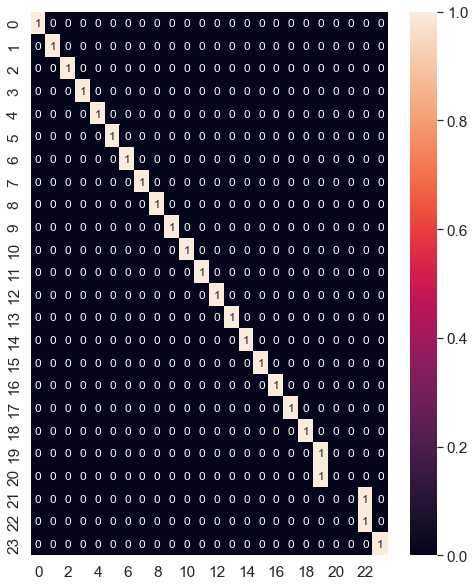

In [195]:
rnn_modelo_cm = confusion_matrix(np.argmax(y, axis=1), rnn_modelo_predicted)

# Visualizamos la matriz de confusión
import seaborn as sn
rnn_modelo_df_cm = pd.DataFrame(rnn_modelo_cm, range(len(rnn_modelo_predicted)), range(len(rnn_modelo_predicted)))  
plt.figure(figsize = (8,10))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(rnn_modelo_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()

In [196]:
# demuestra la predicciones del modelo
for pattern in dataX:
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(len(alfabeto))
    prediction = modelo.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    print(seq_in, "->", result)

['α'] -> β
['β'] -> γ
['γ'] -> δ
['δ'] -> ε
['ε'] -> ζ
['ζ'] -> η
['η'] -> θ
['θ'] -> ι
['ι'] -> κ
['κ'] -> λ
['λ'] -> μ
['μ'] -> ν
['ν'] -> ξ
['ξ'] -> ο
['ο'] -> π
['π'] -> ρ
['ρ'] -> ς
['ς'] -> σ
['σ'] -> τ
['τ'] -> υ
['υ'] -> υ
['φ'] -> ψ
['χ'] -> ψ
['ψ'] -> ω


In [197]:
# sumariza el rendimiento del modelo
scores = modelo.evaluate(X, y, verbose=0)
print("Precisión del modelo: %.2f%%" % (scores[1]*100))

Precisión del modelo: 91.67%


Obtuvimos una precisión moderadamente para este modelo, con la arquitectura que hemos utilizado. Podríamos buscar otra arquitectura para lograr mejorar la predicción. Ahora utilizamos el optimizador `adam` y comparamos.

In [198]:
print("Configurando modelo ...")
modelo = Sequential()
modelo.add(LSTM(64, input_shape = (X.shape[1], X.shape[2])))
modelo.add(Dense(15, activation = 'relu'))
modelo.add(Dense(y.shape[1], activation = 'softmax'))
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Entrenando modelo ...")
start = time.time()
modelo.fit(X, y, epochs=500, batch_size=1, verbose=0)
end= time.time()
print(f"Entrenar este modelo tomó {(end-start)/60} minutos.")

print("Efecuando predicciones...")
modelo_pred = modelo.predict(X,verbose=0)
rnn_modelo_predicted = np.argmax(modelo_pred, axis=1)
rnn_modelo_df_cm = pd.DataFrame(rnn_modelo_cm, range(len(rnn_modelo_predicted)), range(len(rnn_modelo_predicted))) 
print(rnn_modelo_df_cm)

print("Precisión...")
# demuestra la predicciones del modelo
for pattern in dataX:
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(len(alfabeto))
    prediction = modelo.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    print(seq_in, "->", result)
    
# sumariza el rendimiento del modelo
scores = modelo.evaluate(X, y, verbose=0)
print("Precisión del modelo: %.2f%%" % (scores[1]*100))

Configurando modelo ...
Entrenando modelo ...
Entrenar este modelo tomó 0.7124378085136414 minutos.
Efecuando predicciones...
    0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  19  20  \
0    1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1    0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2    0   0   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3    0   0   0   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4    0   0   0   0   1   0   0   0   0   0  ...   0   0   0   0   0   0   0   
5    0   0   0   0   0   1   0   0   0   0  ...   0   0   0   0   0   0   0   
6    0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
7    0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   0   0   0   
8    0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
9    0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
10   

Con este optimizador logramos incrementar sustancialmente la precisión del modelo, utilizando la misma arquitectura.